# Red Neuronal Multicapa para MNIST.

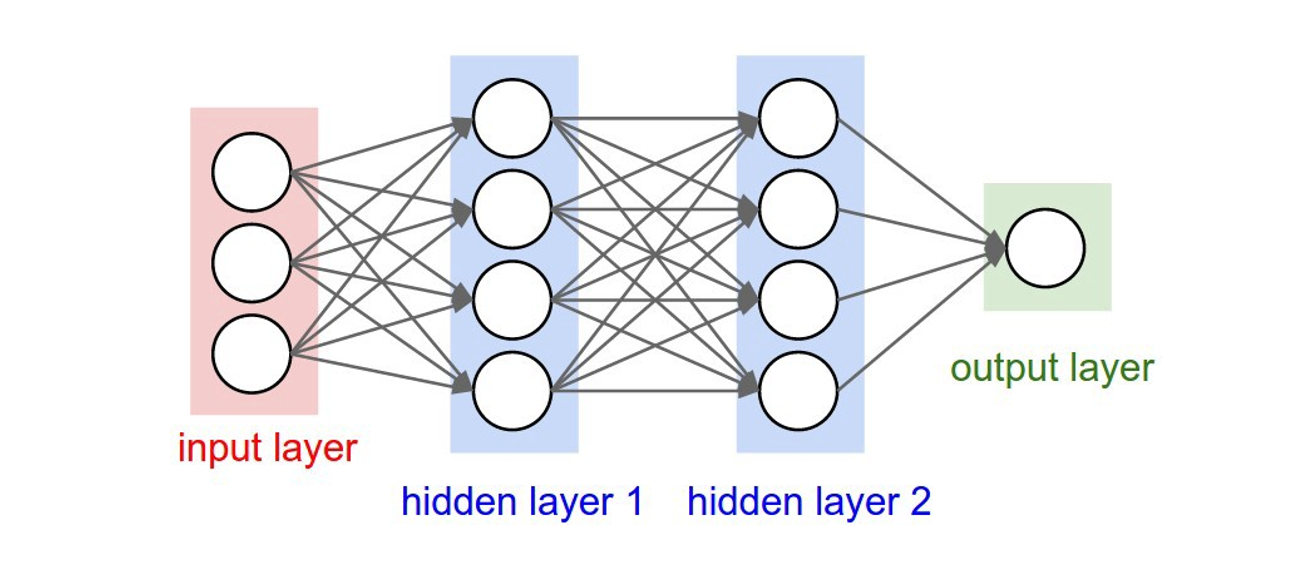

Un dataset muy usado dentro del campo del Deep Learning es el dataset MNIST.
Este dataset contiene 20.000 muestras de imagenes de 28x28 píxeles (784 píxeles), que muestran dígitos escritos a mano, y que nosotros trataremos de clasificar del 0-9. Es decir, trabajaremos con un dataset de dimensiones 20.000x784. Cada una de las variables de entrada contiene un valor entero que varía de 0 a 255, indicando la intensidad en escala de grises del pixel correspondiente.

¿Podremos conseguir entrenar a una Red Neuronal Multicapa para clasificar estos datos?

---

**Tarea:** Utilizar las funcionalidades de Keras para crear y entrenar a un clasificador.

1. Cargar los datos y preprocesarlos de la manera adecuada. Escalar las variables de entrada, convertir las etiquetas a **one-hot label**, etc...
 
2. Una vez cargados tus datos, generar los datos de entrenamiento y de validación. También visualizar alguna de las imágenes de tu dataset para entender con qué tipo de imágenes estamos operando.

3. Construir el modelo con Keras. Elegir cuántas capas utilizar, cuántas neuronas, qué tipo de función de activación, etc. Cada decisión tomada de la arquitectura deberá de estar justificada.

4. Entrenar el modelo con Keras. Elegir qué optimizador usar, qué learning-rate, qué batch_size, epochs, etc. Cada decisión tomada de la arquitectura debe de estar justificada. Utiliza 

5. Cuando se entrene el modelo, para cada *epoch* mostrar métricas de la *función de coste* y el *Accuracy* para el *train* y el *validation* set. Vvisualizar en una gráfica la evoluciónde ambas métricas en función del número de epochs.

6. Una vez esté el modelo entrenado, ¿Qué accuracy has obtenido? Seleccionar algunos ejemplos que **NO** hayan sido clasificados correctamente por tu clasificador y visualizarlos. Mostrar igualmente en el título de cada gráfica la predicción generada por tu modelo. ¿Son errores razonables?.

In [ ]:
import numpy as np

# Cargamos el dataset MNIST.
mnist = np.genfromtxt('./sample_data/mnist_train_small.csv', delimiter=',')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X = mnist[:, 1: ]
Y = OneHotEncoder().fit_transform(mnist[:, 0:1]).toarray()

# Escalamos el valor de X
X = X / 255.

print(X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print(X_train.shape, Y_train.shape)

(20000, 784) (20000, 10)
(15000, 784) (15000, 10)


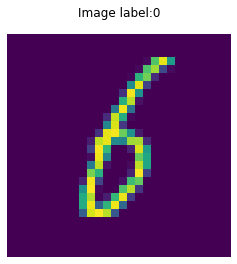

In [ ]:
#Ejemplo de una imagen del dataset

import matplotlib.pyplot as plt

im = 127

plt.matshow(X[im, :].reshape((28,28)))
plt.title('Image label:' + str(int(Y[im, 0])))
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers       import Dense, Flatten, Conv2D
from tensorflow.keras              import Model, Sequential
from tensorflow.keras.optimizers   import SGD

model = Sequential()

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(10,  activation='softmax'))

model.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics='acc')

In [ ]:
#Entrenamiento del modelo

hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=10)

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5745 - acc: 0.8201 - val_loss: 0.3350 - val_acc: 0.9008
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2369 - acc: 0.9279 - val_loss: 0.2267 - val_acc: 0.9298
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1567 - acc: 0.9531 - val_loss: 0.1880 - val_acc: 0.9458
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1191 - acc: 0.9650 - val_loss: 0.2755 - val_acc: 0.9190
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0885 - acc: 0.9720 - val_loss: 0.2160 - val_acc: 0.9394
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0701 - acc: 0.9765 - val_loss: 0.1632 - val_acc: 0.9526
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0516 - acc: 0.9842 - val_loss: 0.1389 - val_acc: 0.9628
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
model.evaluate(X_test, Y_test)
model.save_weights('./model1')

157/157 [==============================] - 0s 1ms/step - loss: 0.1680 - acc: 0.9584


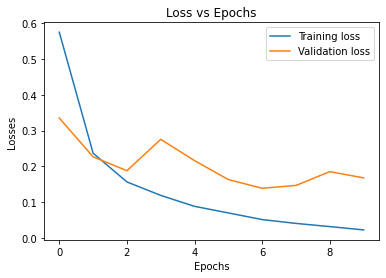

In [ ]:
# Visualizamos la evolución del error durante el entrenamiento.
plt.plot(hist.history['loss'],     label='Training loss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

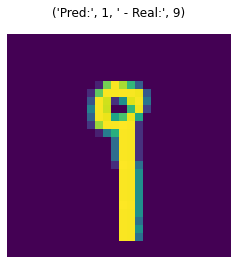

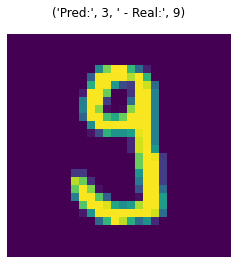

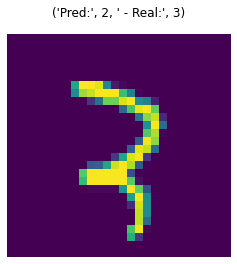

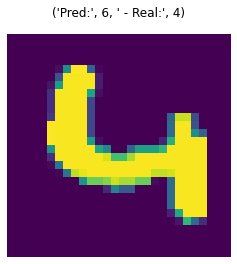

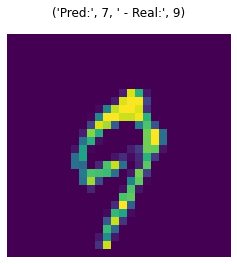

In [ ]:
# Visualizamos alguno de las predicciones erroneas.
Yp = model.predict(X_test)

pred_errors = np.argmax(Yp, axis=1) != np.argmax(Y_test, axis=1)

X_errors = X_test[pred_errors]
Yp_errors = np.argmax(Yp[pred_errors], axis=1)
Yr_errors = np.argmax(Y_test[pred_errors], axis=1)

for im in np.random.choice(range(len(X_errors)), 5):
  plt.matshow(X_errors[im, :].reshape((28, 28)))
  plt.axis('off')
  plt.title(('Pred:', Yp_errors[im], ' - Real:', Yr_errors[im]))

In [ ]:
# Rendimiento del modelo entrenado.
print(model.evaluate(X_test, Y_test))
# Guardamos el modelo.
model.save("./model_1")

model = None # Haciendo cosas sin querer perdemos el modelo. :(

model = tf.keras.models.load_model("./model_1")
# Comprobamos que el modelo sigue entrenado.
print(model.evaluate(X_test, Y_test))

157/157 [==============================] - 0s 1ms/step - loss: 0.1680 - acc: 0.9584
[0.16795068979263306, 0.9584000110626221]
INFO:tensorflow:Assets written to: ./model_1/assets
157/157 [==============================] - 0s 1ms/step - loss: 0.1680 - acc: 0.9584
[0.16795068979263306, 0.9584000110626221]


# Data Augmentation.


 **¿Qué tan robusto es el modelo?**


Hemos comprobado que haciendo uso de una simple Red Neuronal Multicapa podemos obtener una muy buena tasa de acierto (aprox. 96%) en la predicción de números de MNIST. Pero... ¿Qué tan robusto es el modelo? O dicho de otra manera, ¿cómo se ven afectadas las predicciones del modelo cuándo aparecen variaciones en los datos de entrada?.

Las imágenes que le pasamos al modelo podrían ser generadas a partir de tomar una foto a un dígito escrito a mano. También es probable que algunas de las fotos que queramos predecir no estén centradas (ej. a) o no estén correctamente alineadas (ej. b) o sufran de mala calidad (ej. c). ***¿Crees que esto puede afectar al rendimiento del modelo?***


<br>

<centered> ![texto alternativo](https://i.imgur.com/qs86wF1.jpg) </centered>

---

**Tarea:** 

1. Utilizar el ***test_set*** para generar tres nuevos sets de pruebas diferentes que incluyan las distintas perturbaciones que hemos mencionado anteriormente (translaciones, rotaciones, y ruido 25% y ruido 50%). Para esto, hacer uso de los métodos de ***ImageDataGenerator()*** con los que se podrán definir distintos tipos de preprocesamientos. Para la perturbación con ruido, implementar un método propio para añadir ruido y aplicarlo a través del atributo ***preprocessing_function*** del generador.

> **En traslación desplaza un máximo del 50% de los píxeles de la imagen por cada eje. En rotación no rotes más de 90º la imagen. En ruido, añade una cantidad máxima de ruido de +-0.25 y +-0.5 (25% Ruido y 50% Ruido).**

> 📣 **Importante** : Para aplicar las transformaciones en las imágenes tendrás que variar su forma a bidimensional. Recuerda volver a recuperar su forma de vector unidimensional antes de entrenar a red neuronal. 

2. Comprobar el funcionamiento de los generadores extrayendo una imagen de cada uno de estos y visualizándolas todas en un mismo subplot.

3. Evaluar el comportamiento del modelo ante datos con perturbaciones. ¿Cómo esperas que sea este comportamiento? ¿Será **robusto** frente a estas distorsiones? Evalúar a tu modelo con cada uno de los datos de los generadores para el ***test set*** y comparar los resultados obtenidos. ¿Se te ocurre alguna forma de evitar esto?

In [ ]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


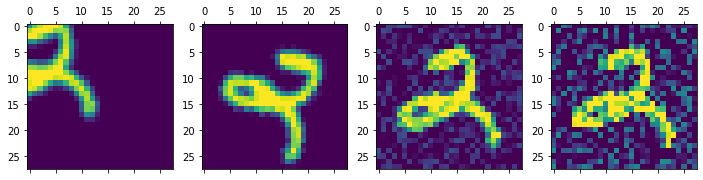

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers              import Dense, Flatten, Conv2D
from tensorflow.keras                     import Model, Sequential
from tensorflow.keras.optimizers          import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cambiamos la forma a imagen bidimensional de 28x28
# para poder hacer las transformaciones.
X_train = X_train.reshape(-1, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)

# Creamos funciones de preprocesamiento a nuestro gusto
# que añada un factor de ruido deseado.

def add_noise(img, f):
    noise = (np.random.rand(28, 28, 1) * 2 - 1) * f
    img = np.clip(img + noise, 0., 1.)
    return img

# Generador de imágenes al 25%
n25_datagen = ImageDataGenerator(preprocessing_function=lambda x: add_noise(x, 0.25))
# Generador de imágenes al 50%
n50_datagen = ImageDataGenerator(preprocessing_function=lambda x: add_noise(x, 0.50))
# Generador de imágenes rotadas.
rot_datagen = ImageDataGenerator(rotation_range=90)
# Generador de trasladadas.
pos_datagen = ImageDataGenerator(width_shift_range  = 0.5, 
                                 height_shift_range = 0.5)

# Añadimos todos los preprocesamientos en una lista.
preproc = [pos_datagen, rot_datagen, n25_datagen, n50_datagen]

fig, axs = plt.subplots(1, 4, figsize=(12,12))

# Probamos cada uno de los preprocesamientos con una imagen.
for i in range(4):
  axs[i].matshow(next(preproc[i].flow(X_train[0:1,...]))[0,:,:,0])
plt.show()

In [ ]:
print('Perturbación de posición:', model.evaluate(pos_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('Perturbación de rotación:', model.evaluate(rot_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('Perturbación de ruido 25:', model.evaluate(n25_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('Perturbación de ruido 50:', model.evaluate(n50_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))

157/157 [==============================] - 1s 10ms/step - loss: 6.9988 - acc: 0.1316
Perturbación de posición: [6.998790740966797, 0.1316000074148178]
157/157 [==============================] - 1s 9ms/step - loss: 4.2741 - acc: 0.4742
Perturbación de rotación: [4.274113655090332, 0.4742000102996826]
157/157 [==============================] - 1s 5ms/step - loss: 0.1756 - acc: 0.9554
Perturbación de ruido 25: [0.17556868493556976, 0.9553999900817871]
157/157 [==============================] - 1s 5ms/step - loss: 0.4138 - acc: 0.8752
Perturbación de ruido 50: [0.4137883186340332, 0.8751999735832214]


In [ ]:
%%time

def create_model():
  # Creamos el modelo.
  model = Sequential()

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64,  activation='relu'))
  model.add(Dense(32,  activation='relu'))
  model.add(Dense(16,  activation='relu'))
  model.add(Dense(10,  activation='softmax'))

  return model

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 12.9 µs


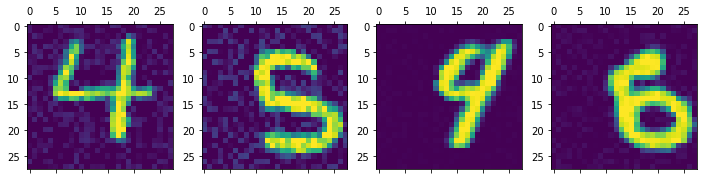

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
469/469 [==============================] - 8s 17ms/step - loss: 2.0814 - acc: 0.2479 - val_loss: 1.6849 - val_acc: 0.4120
Epoch 2/100
469/469 [==============================] - 8s 17ms/step - loss: 1.4893 - acc: 0.4881 - val_loss: 1.3978 - val_acc: 0.5166
Epoch 3/100
469/469 [==============================] - 8s 17ms/step - loss: 1.1921 - acc: 0.6006 - val_loss: 1.2094 - val_acc: 0.5880
Epoch 4/100
469/469 [==============================] - 8s 17ms/step - loss: 1.0167 - acc: 0.6601 - val_loss: 0.9243 - val_acc: 0.6974
Epoch 5/100
469/469 [==============================] - 8s 17ms/step - loss: 0.9188 - acc: 0.6956 - val_loss: 0.8515 - val_acc: 0.7224
Epoch 6/100
469/469 [==============================] - 8s 17ms/step - loss: 0.8393 - acc: 0.7271 - val_loss: 0.7896 - val_acc: 0.7322
Epoch 7/100
469/469 [==============================] - 9s 18ms/step - loss: 0.7856 - acc: 0.7467 - val_loss: 0.7526 - va

In [ ]:
# Creamos un nuevo modelo.
model = create_model()
model.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics='acc')

def add_noise(img, f):
    noise = (np.random.rand(28, 28, 1) * 2 - 1) * np.random.rand() * f 
    img = np.clip(img + noise, 0., 1.)
    return img

pert_datagen = ImageDataGenerator(width_shift_range  = 0.2, 
                                  height_shift_range = 0.2,
                                  rotation_range=45,
                                  preprocessing_function=lambda img: add_noise(img, 0.25))

fig, axs = plt.subplots(1, 4, figsize=(12,12))
for i in range(4):
  axs[i].matshow(next(pert_datagen.flow(X_train))[0,:,:,0])
plt.show()

model.fit_generator(pert_datagen.flow(X_train.reshape(-1, 28, 28, 1), Y_train), 
                    validation_data=(pert_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)), 
                    epochs=100)

print('Perturbación de posición:', model.evaluate(pos_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('Perturbación de rotación:', model.evaluate(rot_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('Perturbación de ruido 25:', model.evaluate(n25_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('Perturbación de ruido 50:', model.evaluate(n50_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))

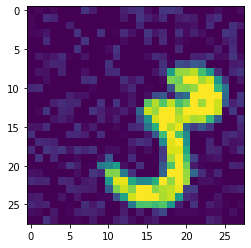

In [ ]:
plt.imshow(next(pert_datagen.flow(X_train))[0,:,:,0])